In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ggh.signature import SecretKey, PublicKey, generate_keypair
from ggh.attack import generate_pairs

np.random.seed(999)

pk, sk = generate_keypair(2)  # n = 6 is the highest we can go before HNF 
                              # overflows C integers
display(sk.to_sympy_matrix(), pk.to_sympy_matrix())
print(f"ortho-defect of sk is {sk.ortho_defect}")
print(f"ortho-defect of pk is {pk.ortho_defect}")

sample_pairs = generate_pairs(10000, sk)

Matrix([
[293,  -8],
[  1, 260]])

Matrix([
[76188, 293],
[    0,   1]])

ortho-defect of sk is 1.0003740339937717
ortho-defect of pk is 293.0017064796722
Generated 10000 message-signature pairs in 0.13 seconds


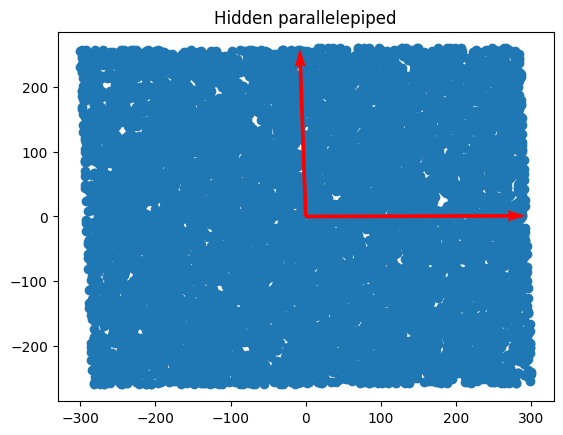

In [3]:
# Visualize the hidden parallelepiped
samples = [(sigma - m) * 2 for (m, sigma) in sample_pairs]
sample_xs = [sample[0] for sample in samples]
sample_ys = [sample[1] for sample in samples]

fig, ax = plt.subplots()
ax.set_title("Hidden parallelepiped")
ax.scatter(x=sample_xs, y=sample_ys)
for base_vector in sk.iter_base_vectors():
    x, y = base_vector[0], base_vector[1]
    ax.quiver(0, 0, x, y, color="red", angles='xy', scale_units='xy', scale=1)

plt.show()